# Mets Submission

In [1]:
## Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

In [2]:
## Read in dataframe
df = pd.read_csv('pitch-arsenal-stats.csv')
df_player = df[df['player_id'] == 666142].sort_values(by='pitch_type',ascending=True)
df_player.head()

,"last_name, first_name",player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,pa,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
506,"Ragans, Cole",666142,KC,CH,Changeup,2.8,11,376,23.7,110,0.152,0.192,0.212,34.4,22.7,19.7,0.195,0.277,0.248,20.0
1459,"Ragans, Cole",666142,KC,CUKC,Curveball,-0.1,0,198,12.5,39,0.194,0.306,0.251,29.5,30.8,18.2,0.277,0.411,0.327,37.5
1376,"Ragans, Cole",666142,KC,FC,Cutter,1.2,3,211,13.3,43,0.270,0.378,0.345,23.0,9.3,17.4,0.263,0.423,0.350,38.2
296,"Ragans, Cole",666142,KC,FF,4-Seamer,-0.7,-4,636,40.1,147,0.234,0.411,0.341,27.9,32.7,22.4,0.193,0.358,0.305,52.6
1170,"Ragans, Cole",666142,KC,SL,Slider,4.4,7,165,10.4,52,0.180,0.200,0.179,40.6,46.2,30.0,0.206,0.246,0.202,37.0


After reviewing the data provided and looking at Baseball Savant Leaderboards, I have concluded that Cole Ragans can benefit from a pitch mix change in 2024. Specifically throwing his Slider more often to both left handed and right handed batters.

The following plots show Cole Ragan's usage rates and Run Values per 100 pitches of each pitch in his arsenal and how his distribution of pitches changes depending on the batter's handedness.

Text(0.5, 1.0, 'Cole Ragans Pitch Arsenal - Runs Per 100 Pitches')

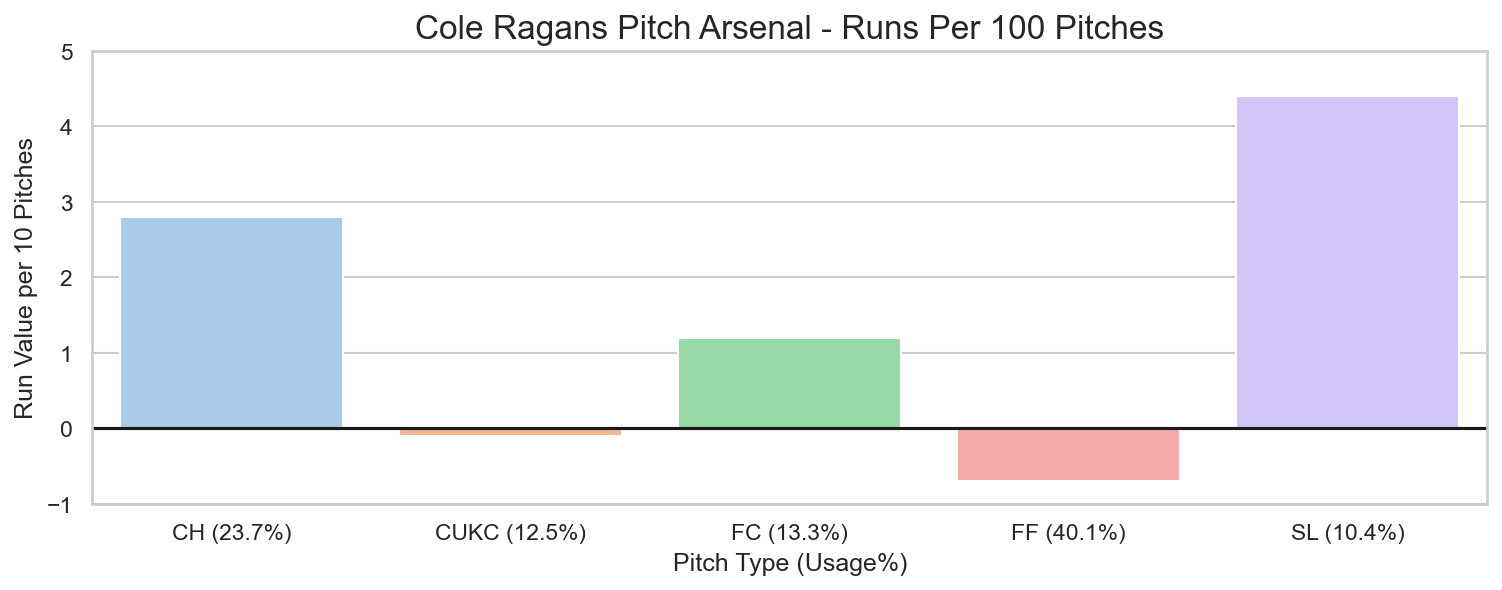

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(1,1,figsize=(12,4),dpi=150)
sns.barplot(
            x=df_player['pitch_type'] + ' (' + df_player['pitch_usage'].astype(str) + '%)',
            y=df_player['run_value_per_100'])
ax.set_ylim(-1, 5)
ax.set_xlim(-.5, 4.5)
ax.set_xlabel('Pitch Type (Usage%)',fontsize=12)
ax.set_ylabel('Run Value per 10 Pitches',fontsize=12)
ax.hlines(y=0,xmin=-0.5,xmax=4.5,color='k')
ax.set_title(label='Cole Ragans Pitch Arsenal - Runs Per 100 Pitches',fontsize=16)

To get data relating to batter handedness, I downloaded the data for all of Cole Ragan's Pitches from teh 2023 season using the Package PyBaseball.

In [4]:
## Import Pybaseball
import pybaseball as pyb
## Scrape Cole Ragan's Statcast pitch data
pbp_data = pyb.statcast_pitcher(start_dt='2023-01-01',end_dt='2023-12-31',player_id=666142)
pbp_data['delta_run_exp'] = pbp_data['delta_run_exp']*-1

## Create a dataframe which summarizes Cole Ragan's usage and
## Run Values by Pitch Type and Batter Handedness 
df_pitch_type_hand = pbp_data.groupby(['pitch_type','stand']).agg(
    pitch_count = ('release_speed','count'),
    run_value = ('delta_run_exp','sum'))
df_pitch_type_hand['pitch_usage'] = df_pitch_type_hand['pitch_count']/ pbp_data.groupby(['stand'])['release_speed'].count()
df_pitch_type_hand['run_value_per_100'] = df_pitch_type_hand['run_value'] / df_pitch_type_hand['pitch_count'] * 100
df_pitch_type_hand = df_pitch_type_hand.reset_index().sort_values(by=['pitch_type','stand','pitch_usage',],ascending=[True,True,False])
df_pitch_type_hand.head(10)

Gathering Player Data


,pitch_type,stand,pitch_count,run_value,pitch_usage,run_value_per_100
0,CH,L,19,0.345,0.053521,1.815789
1,CH,R,357,10.291,0.290008,2.882633
2,CU,L,29,-0.919,0.081690,-3.168966
3,CU,R,169,0.625,0.137287,0.369822
4,FC,L,52,0.009,0.146479,0.017308
5,FC,R,159,2.518,0.129163,1.583648
6,FF,L,162,-3.035,0.456338,-1.873457
7,FF,R,474,-1.370,0.385053,-0.289030
8,SL,L,93,4.132,0.261972,4.443011
9,SL,R,72,3.147,0.058489,4.370833


This Plot illustrates Cole Ragan's usage of his pitches depending on the batter's handedness.

Text(0, 0.5, 'Pitch Usage%')

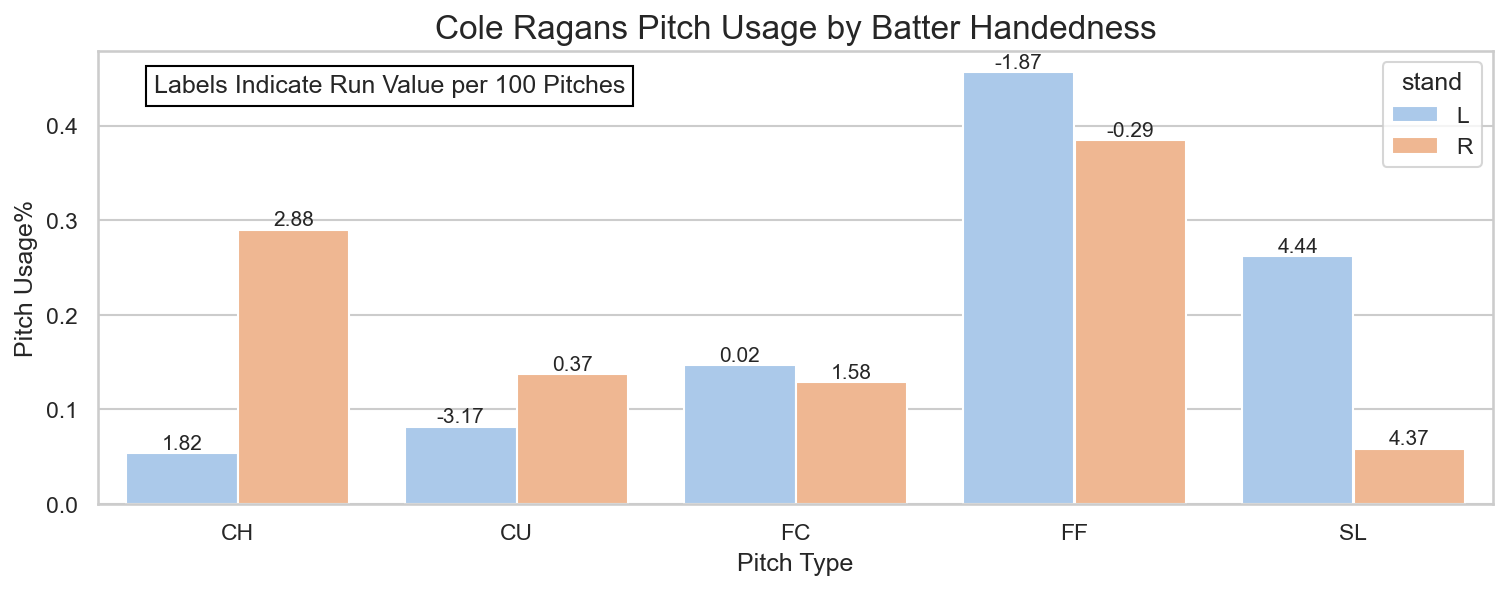

In [5]:
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(1,1,figsize=(12,4),dpi=150)
bar_plot = sns.barplot(data=df_pitch_type_hand,
            x='pitch_type',
            y='pitch_usage',
            hue='stand',
            ax=ax)

ax.bar_label(ax.containers[0],
             labels=[str(x) for x in df_pitch_type_hand[
                 df_pitch_type_hand['stand']=='L']['run_value_per_100'].round(2)],
                 fontsize=10)

ax.bar_label(ax.containers[1],
             labels=[str(x) for x in df_pitch_type_hand[
                 df_pitch_type_hand['stand']=='R']['run_value_per_100'].round(2)],
                 fontsize=10)

ax.text(x=-0.3,y=0.43,s='Labels Indicate Run Value per 100 Pitches',ha='left',va='bottom',
        bbox=dict(facecolor='white', edgecolor='black'))
ax.set_title(label='Cole Ragans Pitch Usage by Batter Handedness',fontsize=16)
ax.set_xlabel('Pitch Type',fontsize=12)
ax.set_ylabel('Pitch Usage%',fontsize=12)

My reasoning for a pitch mix change is included in the Microsoft Word File included in this submission.